In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 30)

In [2]:
base_df = pd.read_csv("../data/newborn-diseases.csv")
base_df.head()

,Race/Ethnicity,Case Count,Disorder Type,Screened Count,"Rate per 100,000"
0,American Indian,15,Other Rare Disorders,32300,46.44
1,American Indian,20,"Hypothyroidism, Primary Congenital (PCH)",32300,61.92
2,Asian Indian,26,Other Rare Disorders,68559,37.92
3,Asian Indian,70,"Hypothyroidism, Primary Congenital (PCH)",68559,102.10
4,Black,26,Other Rare Disorders,181203,14.35


In [4]:
disorders_df = base_df.groupby("Disorder Type", as_index=False).sum()[['Disorder Type', 'Case Count']]
disorders_df['Screened Count'] = base_df.groupby("Race/Ethnicity", as_index=False).mean()['Screened Count'].sum()
disorders_df['Rate per 100,000'] = round(disorders_df['Case Count']*100000/disorders_df['Screened Count'],2)
disorders_df = disorders_df.sort_values('Case Count')
disorders_df.head()

,Disorder Type,Case Count,Screened Count,"Rate per 100,000"
12,Methylmalonic Acidemia mut 0 (MMA),6,3488006.0,0.17
15,Propionic Acidemia (PA),7,3488006.0,0.20
3,Citrullinemia type I (Argininosuccinic Acid Sy...,9,3488006.0,0.26
10,Maple Syrup Urine Disease (MSUD),9,3488006.0,0.26
16,"SCID, Severe Combined Immunodeficiency",13,3488006.0,0.37


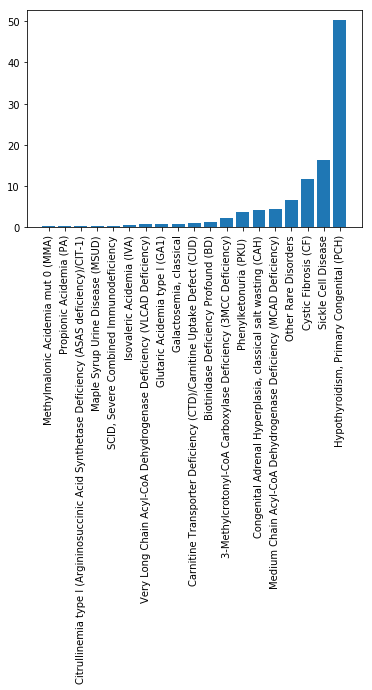

In [5]:
plt.bar(disorders_df['Disorder Type'], disorders_df['Rate per 100,000'])
plt.xticks(rotation=90)
plt.show()

In [6]:
disorders_df.to_csv("../data/cleaned/disorders.csv", index=False)